# Numbers

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

## The `ndarray`: Vectors, matrices and tenosrs

dtype, shape, strides

### Vector

In [4]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [5]:
type(x)

numpy.ndarray

In [6]:
x.dtype

dtype('int64')

In [7]:
x.shape

(3,)

In [8]:
x.strides

(8,)

### Matrix

In [9]:
x = np.array([[1,2,3], [4,5,6]], dtype=np.int32)
x

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [10]:
x.dtype

dtype('int32')

In [11]:
x.shape

(2, 3)

In [12]:
x.strides

(12, 4)

### Tensor

In [13]:
x = np.arange(24).reshape((2,3,4))

In [14]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Creating `ndarray`s

### From a file

In [15]:
%%file numbers.txt
a,b,c # can also skip headers
1,2,3
4,5,6

Overwriting numbers.txt


In [16]:
np.loadtxt('numbers.txt', dtype='int', delimiter=',',
           skiprows=1, comments='#')

array([[1, 2, 3],
       [4, 5, 6]])

### From Python lists or tuples

In [17]:
np.array([
    [1,2,3],
    [4,5,6]
])

array([[1, 2, 3],
       [4, 5, 6]])

### From ranges

arange, linspace, logspace

In [18]:
np.arange(1, 7).reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
np.linspace(1, 10, 4)

array([ 1.,  4.,  7., 10.])

In [20]:
np.logspace(0, 4, 5, dtype='int')

array([    1,    10,   100,  1000, 10000])

### From a function

fromfunciton

In [21]:
np.fromfunction(lambda i, j: i*3 + j + 1, (2,3))

array([[1., 2., 3.],
       [4., 5., 6.]])

In [22]:
np.fromfunction(lambda i, j: (i-2)**2 + (j-2)**2, (5,5))

array([[8., 5., 4., 5., 8.],
       [5., 2., 1., 2., 5.],
       [4., 1., 0., 1., 4.],
       [5., 2., 1., 2., 5.],
       [8., 5., 4., 5., 8.]])

In [23]:
np.fromfunction(lambda i, j: np.where(i<j, 1, np.where(i==j,0, -1)), (5,5))

array([[ 0,  1,  1,  1,  1],
       [-1,  0,  1,  1,  1],
       [-1, -1,  0,  1,  1],
       [-1, -1, -1,  0,  1],
       [-1, -1, -1, -1,  0]])

Adapted from [Circle Squared](http://igpphome.ucsd.edu/~shearer/COMP233/SciAm_Mandel.pdf)

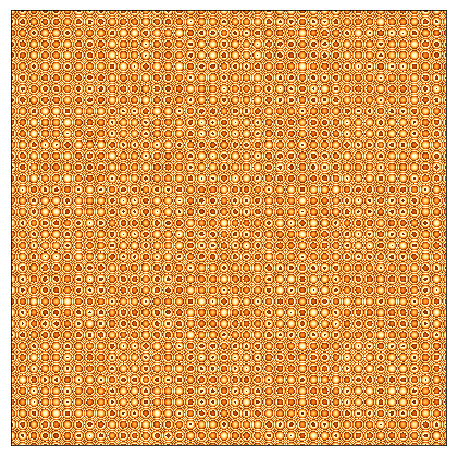

In [24]:
xs = np.fromfunction(lambda i, j:  0.27**2*(i**2 + j**2) % 1.5, 
                     (400, 400),)
plt.figure(figsize=(8,8))
plt.imshow(xs, interpolation='nearest', cmap=plt.cm.YlOrBr)
plt.xticks([])
plt.yticks([])
pass

### From special construcotrs

zeoros, ones, eye

In [25]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [26]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [27]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
np.eye(3, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [29]:
np.eye(4, k=-1)

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

### From random variables

#### Convenience functions

rand, randn

In [30]:
np.random.rand(2,3)

array([[0.24814887, 0.61705192, 0.39086306],
       [0.61476619, 0.04361465, 0.66272298]])

In [31]:
np.random.randn(2,3)

array([[-0.26651649, -0.79181492, -0.50929927],
       [-0.69753872, -1.04183592, -0.33377985]])

#### Distributions

uniform, normal, randint, poisson, multinomial, multivariate_ normal

In [32]:
np.random.uniform(0, 1, (2,3))

array([[0.73666045, 0.93007244, 0.23773897],
       [0.44482111, 0.94114531, 0.92927511]])

In [33]:
np.random.normal(0, 1, (2,3))

array([[ 1.59501457,  1.88147112, -0.12720304],
       [-0.2154431 , -0.11547444, -0.36033117]])

In [34]:
np.random.randint(0, 10, (4,5))

array([[8, 9, 6, 0, 4],
       [6, 8, 1, 3, 3],
       [1, 5, 8, 8, 0],
       [4, 2, 3, 9, 9]])

In [35]:
np.random.poisson(10, (4,5))

array([[11,  9, 14, 14, 12],
       [10,  5, 10,  9, 13],
       [ 8,  6,  9, 12, 14],
       [ 9, 14, 17,  8, 15]])

In [36]:
np.random.multinomial(n=5, pvals=np.ones(5)/5, size=8)

array([[0, 0, 1, 1, 3],
       [0, 1, 2, 1, 1],
       [1, 1, 3, 0, 0],
       [1, 1, 2, 0, 1],
       [0, 1, 0, 1, 3],
       [1, 0, 3, 1, 0],
       [0, 1, 1, 1, 2],
       [0, 2, 0, 0, 3]])

In [37]:
np.random.multivariate_normal(mean=[10,20,30], cov=np.eye(3), size=4)

array([[ 9.89661888, 19.3376653 , 30.17109913],
       [10.67053417, 19.21975538, 30.44762144],
       [ 8.06079377, 21.77987448, 30.11676161],
       [10.12012138, 19.27924423, 30.11963041]])

## Indexing 

In [38]:
x = np.arange(20).reshape((4,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Extracing a scalar

In [39]:
x[1,1]

6

### Extracting a vector

In [40]:
x[1]

array([5, 6, 7, 8, 9])

### Using slices

In [41]:
x[1,:]

array([5, 6, 7, 8, 9])

In [42]:
x[:,1]

array([ 1,  6, 11, 16])

In [43]:
x[1:3,1:3]

array([[ 6,  7],
       [11, 12]])

### Using slices with strides

In [44]:
x[::2,::2]

array([[ 0,  2,  4],
       [10, 12, 14]])

### Extrcting blocks with arbitrary row and column lists (fancy indexing)

`np.ix_`

In [45]:
x[:, [0,3]]

array([[ 0,  3],
       [ 5,  8],
       [10, 13],
       [15, 18]])

Warning: Fancy indexing can only be used for 1 dimension.

In [46]:
x[[0,2],[0,3]]

array([ 0, 13])

Use the helper `np.ix_` to extract arbitrary blocks.

In [47]:
x[np.ix_([0,2], [0,3])]

array([[ 0,  3],
       [10, 13]])

### A slice is a view, not a copy

In [48]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [49]:
y = x[1:-1, 1:-1]
y

array([[ 6,  7,  8],
       [11, 12, 13]])

In [50]:
y *= 10

In [51]:
y

array([[ 60,  70,  80],
       [110, 120, 130]])

In [52]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

Use the copy method to convert a view to a copy

In [53]:
z = x[1:-1, 1:-1].copy()

In [54]:
z

array([[ 60,  70,  80],
       [110, 120, 130]])

In [55]:
z[:] = 0

In [56]:
z

array([[0, 0, 0],
       [0, 0, 0]])

In [57]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

### Boolean indexing

In [58]:
x[x % 2 == 0]

array([  0,   2,   4,  60,  70,  80,  10, 110, 120, 130,  14,  16,  18])

In [59]:
x [x > 3]

array([  4,   5,  60,  70,  80,   9,  10, 110, 120, 130,  14,  15,  16,
        17,  18,  19])

### Functions that return indexes

In [60]:
idx = np.nonzero(x)
idx

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
 array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [61]:
x[idx]

array([  1,   2,   3,   4,   5,  60,  70,  80,   9,  10, 110, 120, 130,
        14,  15,  16,  17,  18,  19])

In [62]:
idx = np.where(x > 3)
idx

(array([0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
 array([4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [63]:
x[idx]

array([  4,   5,  60,  70,  80,   9,  10, 110, 120, 130,  14,  15,  16,
        17,  18,  19])

## Margins and the `axis` argument

In [64]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

The 0th axis has 4 items, the 1st axis has 5 items.

In [65]:
x.shape

(4, 5)

In [66]:
x.mean()

35.15

### Marginalizing out the 0th axis = column summaries

In [67]:
x.mean(axis=0)

array([ 7.5 , 46.75, 52.25, 57.75, 11.5 ])

### Marginalizing out the 1st axis = row summaries

In [68]:
x.mean(axis=1)

array([ 2. , 44.8, 76.8, 17. ])

Note marginalizing out the last axis is a common default.

In [69]:
x.mean(axis=-1)

array([ 2. , 44.8, 76.8, 17. ])

### Marginalization works for higher dimensions in the same way

In [70]:
x = np.random.random((2,3,4))
x

array([[[0.85415662, 0.12972231, 0.66534244, 0.14883498],
        [0.43427377, 0.04139969, 0.89977416, 0.83160265],
        [0.37978923, 0.08507859, 0.59237958, 0.70408953]],

       [[0.77019566, 0.8579888 , 0.30592491, 0.73147525],
        [0.14862304, 0.74576425, 0.36301046, 0.41042044],
        [0.40602024, 0.90569557, 0.62984442, 0.50589796]]])

In [71]:
x.shape

(2, 3, 4)

In [72]:
x.mean(axis=0).shape

(3, 4)

In [73]:
x.mean(axis=1).shape

(2, 4)

In [74]:
x.mean(axis=2).shape

(2, 3)

In [75]:
x.mean(axis=(0,1)).shape

(4,)

In [76]:
x.mean(axis=(0,2)).shape

(3,)

In [77]:
x.mean(axis=(1,2)).shape

(2,)

## Broadcasting

In [78]:
x1 = np.arange(12)

In [79]:
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [80]:
x1 * 10

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

In [81]:
x2 = np.random.randint(0,10,(3,4))

In [82]:
x2

array([[8, 6, 2, 6],
       [4, 8, 0, 2],
       [5, 0, 4, 2]])

In [83]:
x2 * 10

array([[80, 60, 20, 60],
       [40, 80,  0, 20],
       [50,  0, 40, 20]])

In [84]:
x2.shape

(3, 4)

### Column-wise broadcasting

In [85]:
mu = np.mean(x2, axis=0)
mu.shape

(4,)

In [86]:
x2 - mu

array([[ 2.33333333,  1.33333333,  0.        ,  2.66666667],
       [-1.66666667,  3.33333333, -2.        , -1.33333333],
       [-0.66666667, -4.66666667,  2.        , -1.33333333]])

In [87]:
(x2 - mu).mean(axis=0)

array([-2.96059473e-16, -2.96059473e-16,  0.00000000e+00, -1.48029737e-16])

### Row wise broadcasting

In [88]:
mu = np.mean(x2, axis=1)
mu.shape

(3,)

In [89]:
try:
    x2 - mu
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,4) (3,) 


### We can add a "dummy" axis using None or `np.newaxis`

In [90]:
mu[:, None].shape

(3, 1)

In [91]:
x2 - mu[:, None]

array([[ 2.5 ,  0.5 , -3.5 ,  0.5 ],
       [ 0.5 ,  4.5 , -3.5 , -1.5 ],
       [ 2.25, -2.75,  1.25, -0.75]])

In [92]:
x2 - mu[:, np.newaxis]

array([[ 2.5 ,  0.5 , -3.5 ,  0.5 ],
       [ 0.5 ,  4.5 , -3.5 , -1.5 ],
       [ 2.25, -2.75,  1.25, -0.75]])

In [93]:
np.mean(x2 - mu[:, None], axis=1)

array([0., 0., 0.])

#### Reshaping works too

In [94]:
x2 - mu.reshape((-1,1))

array([[ 2.5 ,  0.5 , -3.5 ,  0.5 ],
       [ 0.5 ,  4.5 , -3.5 , -1.5 ],
       [ 2.25, -2.75,  1.25, -0.75]])

#### Broadcasting examples

Creating a 12 by 12 multiplication table

In [95]:
x = np.arange(1, 13)
x[:,None] * x[None,:]

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

Scaling to have zero mean and unit standard devation for each feature.

In [96]:
x = np.random.normal(10, 5,(3,4))
x

array([[ 6.05917915,  1.79133158,  9.82062445,  7.70187484],
       [ 9.8769253 ,  6.73862638,  9.57927451,  7.5143654 ],
       [13.39277163, 10.44680329, 12.58860995, 19.63545736]])

Standardize column-wise

In [97]:
(x - x.mean(axis=0))/x.std(axis=0)

array([[-1.24120058, -1.27882893, -0.61687503, -0.69050787],
       [ 0.03360298,  0.11649247, -0.79365091, -0.72357681],
       [ 1.2075976 ,  1.16233647,  1.41052594,  1.41408468]])

Standardize row-wise

In [98]:
(x - x.mean(axis=1)[:, None])/x.std(axis=1)[:, None]

array([[-0.09639489, -1.5446078 ,  1.17998004,  0.46102265],
       [ 1.08703592, -1.26628856,  0.86383574, -0.6845831 ],
       [-0.18228675, -1.04407046, -0.41752805,  1.64388526]])

## Combining `ndarray`s

In [99]:
x1 = np.zeros((3,4))
x2 = np.ones((3,5))
x3 = np.eye(4)

In [100]:
x1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [101]:
x2

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [102]:
x3

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Binding rows when number of columns is the same

In [103]:
np.r_[x1, x3]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Binding columns when number of rows is the same

In [104]:
np.c_[x1, x2]

array([[0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.]])

### You can combine more than 2 at a time

In [105]:
np.c_[x1, x2, x1]

array([[0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.]])

### Stacking

In [106]:
np.vstack([x1, x3])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [107]:
np.hstack([x1, x2])

array([[0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [108]:
np.dstack([x2, 2*x2, 3*x2])

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

### Generic stack with axis argument

In [109]:
np.stack([x2, 2*x2, 3*x2], axis=0)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]]])

In [110]:
np.stack([x2, 2*x2, 3*x2], axis=1)

array([[[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]],

       [[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]],

       [[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]]])

In [111]:
np.stack([x2, 2*x2, 3*x2], axis=2)

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

### Repetition and tiling

#### For a vector

In [112]:
x = np.array([1,2,3])

In [113]:
np.repeat(x, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [114]:
np.tile(x, 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

#### For a matrix

In [115]:
x = np.arange(6).reshape((2,3))
x

array([[0, 1, 2],
       [3, 4, 5]])

In [116]:
np.repeat(x, 3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5])

In [117]:
np.repeat(x, 3, axis=0)

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [3, 4, 5],
       [3, 4, 5]])

In [118]:
np.repeat(x, 3, axis=1)

array([[0, 0, 0, 1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4, 5, 5, 5]])

In [119]:
np.tile(x, 3)

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5]])

## Splitting `ndarray`s

In [120]:
x = np.arange(32).reshape((4,8))

In [121]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])

In [122]:
np.split(x, 4)

[array([[0, 1, 2, 3, 4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11, 12, 13, 14, 15]]),
 array([[16, 17, 18, 19, 20, 21, 22, 23]]),
 array([[24, 25, 26, 27, 28, 29, 30, 31]])]

In [123]:
np.split(x, 4, axis=1)

[array([[ 0,  1],
        [ 8,  9],
        [16, 17],
        [24, 25]]), array([[ 2,  3],
        [10, 11],
        [18, 19],
        [26, 27]]), array([[ 4,  5],
        [12, 13],
        [20, 21],
        [28, 29]]), array([[ 6,  7],
        [14, 15],
        [22, 23],
        [30, 31]])]

## Vectorization

### Example 1

The operators and functions (ufuncs) in Python are vectorized, and will work element-wise over all entries in an `ndarray`.

In [124]:
xs = np.zeros(10, dtype='int')
for i in range(10):
    xs[i] = i**2
xs

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [125]:
xs = np.arange(10)**2
xs

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Using ufuncs

In [126]:
np.sqrt(xs)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [127]:
np.log1p(xs)

array([0.        , 0.69314718, 1.60943791, 2.30258509, 2.83321334,
       3.25809654, 3.61091791, 3.91202301, 4.17438727, 4.40671925])

### Example 2

In [128]:
n = 10

xs = np.random.rand(n)
ys = np.random.rand(n)

s = 0
for i in range(n):
    s += xs[i] * ys[i]
s

2.7827098775081853

In [129]:
np.dot(xs, ys)

2.7827098775081853

In [130]:
xs @ ys

2.7827098775081853

### Example 3

\begin{align}
y_0 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
y_1 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
y_2 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
\end{align}




In [131]:
m = 3
n = 2

alpha = np.random.rand(1)
betas = np.random.rand(n,1)
xs = np.random.rand(m,n)

In [132]:
alpha

array([0.06146336])

In [133]:
betas

array([[0.34905592],
       [0.10784099]])

In [134]:
xs

array([[0.21880952, 0.09890911],
       [0.55672489, 0.38004961],
       [0.09152686, 0.94539268]])

### Using loops

In [135]:
ys = np.zeros((m,1))
for i in range(m):
    ys[i] = alpha
    for j in range(n):
        ys[i] += betas[j] * xs[i,j]
ys

array([[0.14850658],
       [0.29677641],
       [0.19536344]])

### Removing inner loop

In [136]:
ys = np.zeros((m,1))
for i in range(m):
    ys[i] = alpha + xs[i,:].T @ betas
ys

array([[0.14850658],
       [0.29677641],
       [0.19536344]])

### Removing all loops

In [137]:
ys = alpha + xs @ betas
ys

array([[0.14850658],
       [0.29677641],
       [0.19536344]])

### Alternative approach

The calculaiton with explicit intercepts and coefficients is common in deep learning, where $\alpha$ is called the bias ($b$) and $\beta$ are called the weights ($w$), and each equation is $y[i] = b + w[i]*x[i]$.

It is common in statisiics to use an augmented matrix in which the first column is all ones, so that all that is needed is a single matrix multiplicaiotn.

In [138]:
X = np.c_[np.ones(m), xs]
X

array([[1.        , 0.21880952, 0.09890911],
       [1.        , 0.55672489, 0.38004961],
       [1.        , 0.09152686, 0.94539268]])

In [139]:
alpha

array([0.06146336])

In [140]:
betas

array([[0.34905592],
       [0.10784099]])

In [141]:
betas_ = np.concatenate([[alpha], betas])
betas_

array([[0.06146336],
       [0.34905592],
       [0.10784099]])

In [142]:
ys = X @ betas_
ys

array([[0.14850658],
       [0.29677641],
       [0.19536344]])

### Simulating diffusion

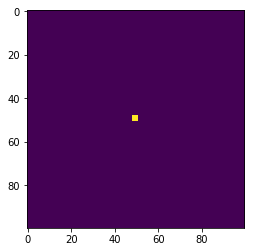

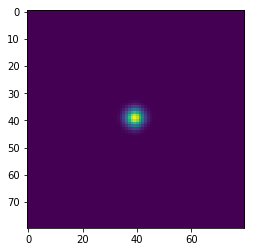

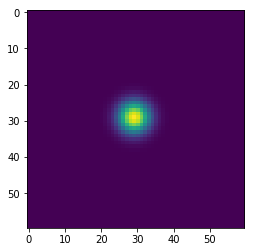

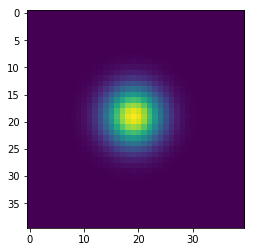

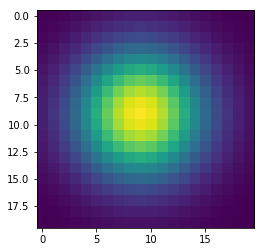

In [143]:
w = 100
h = 100
x = np.zeros((w+2,h+2), dtype='float')
x[(w//2-1):(w//2+2), (h//2-1):(h//2+2)] = 1

wts = np.ones(5)/5

for i in range(41):
    if i % 10 == 0:    
        plt.figure()
        plt.imshow(x[1:-1, 1:-1], interpolation='nearest')
        
    center = x[1:-1, 1:-1]
    left = x[:-2, 1:-1]
    right = x[2:, 1:-1]
    bottom = x[1:-1, :-2]
    top = x[1:-1, 2:]
    nbrs = np.dstack([center, left, right, bottom, top])
    x = np.sum(wts * nbrs, axis=-1)